# Clasificación Naive Bayes usando el dataset de la competencia de Kaggle (el problema del Titanic)


En este notebook desarrollaremos el problema del Titanic. Este dataset es el más popular entre todos los que quieren iniciar en este mundo de la Ciencia de Datos. Buscamos predecir si un pasajero, con ciertas caractéristicas, sobrevivió o no a esta tragedia ocurrida en el siglo 20.

El link de la competencia es: https://www.kaggle.com/c/titanic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Usualmente salen advertencias de actualizaciones pasadas de las librerías, las ignoramos por ahora...
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importamos dos dataset para esta competencia el train y summit
train = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/train_preproc_titanic.csv')
true_dataset = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/summit_preproc_titanic.csv')

En cada **competencia** de Ciencia de Datos se presenta al concursante un conjunto de datos **sin target** exclusivamente con el objetivo de completar este dato faltante. Por lo tanto este conjunto de datos denominado **true_dataset** no se utiliza en el entrenamiento.

##**Algoritmo Naive Bayes**

El clasificador Naive Bayes asume que el efecto de una característica particular en una clase es independiente de otras características. Se basa en el teorema de bayes, click en el siguiente link para más información https://es.wikipedia.org/wiki/Teorema_de_Bayes



**Por ejemplo: en el caso de una manzana, es roja, alrededor de 7c de diámetro y redonda.**
Un clasificador de Naive Bayes considera que cada una de estas características contribuye de manera independiente a la probabilidad de que esta fruta sea una manzana, independientemente de la presencia o ausencia de las otras características.

 ![texto alternativo](https://drive.google.com/uc?export=view&id=19UKeIYcwDcFrukYXi3wP6NyrfryAQkt7)

 

**Ventaja**

Una ventaja del clasificador de Naive Bayes es que solo se requiere una pequeña cantidad de datos de entrenamiento para estimar los parámetros necesarios para la clasificación


El teorema de Bayes se establece matemáticamente como la siguiente ecuación:

$${\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}},}$$
donde $ A $ y $ B $ son eventos y $ P (B) \neq {0} $.

$P(A \mid B) $ es una [probabilidad condicional](https://en.wikipedia.org/wiki/Conditional_probability): la probabilidad de que ocurra el evento $ A $ dado que $ B $ es verdadero.

$P(B \mid A) $ también es una probabilidad condicional: la probabilidad de que ocurra el evento $ B $ dado que $ A $ es verdadero.

$P(A)$ y $P(B) $ son las probabilidades de observar $ A $ y $ B $ independientemente entre sí; esto se conoce como la [probabilidad marginal](https://en.wikipedia.org/wiki/Marginal_probability).


##**Partición de la data para entrenamiento**

In [ ]:
X = train.drop('Sobrevivio',axis=1)
y = train['Sobrevivio']

In [ ]:
#Realizamos la división de ambas variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.15,random_state=1) #Separa el 15% de la data para generar las predicciones

In [ ]:
"CELDA N°05"
#Mostramos con el parámetro shape la cantidad de filas que resultaron en cada parte
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (757, 7) y para el y_train (757,)
Para el X_test: (134, 7) y para el y_test (134,)


##**Modelo de Naive Bayes** - Clasificación usando GaussianNB

Dada una variable de clase $ y $ y un vector de característica dependiente $ x_1 $ a $ x_n $, el teorema de Bayes establece la siguiente relación:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$
Utilizando la suposición ingenua de independencia de que
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$
para todo $ i $, esta relación se simplifica a
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Dado que $ P (x_1, \dots, x_n) $ es constante dada la entrada, podemos usar la siguiente regla de clasificación:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$ 
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

y podemos usar la estimación de [**Maximum A Posteriori**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) para estimar $ P (y) $ y $ P (x_i \mid y) $ ; la primera es entonces la frecuencia relativa de la clase $ y $ en el conjunto de entrenamiento.

***GaussianNB ()*** implementa el algoritmo Gaussian Naive Bayes para la clasificación. **Se supone que la probabilidad de las características es gaussiana**:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}) $$

Los parámetros $ \sigma_y $ y $ \mu_y $ se estiman utilizando la máxima verosimilitud.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbc = GaussianNB()

In [ ]:
nbc.fit(X_train,y_train)

GaussianNB()

### *Predicción, reporte de clasificación y matriz de confusión*

In [ ]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("La cantidad total de puntos de datos mal etiquetados de {} muestras de prueba es {}".format(len(y_test),mislabel))

La cantidad total de puntos de datos mal etiquetados de 134 muestras de prueba es 27


### *Matriz de confusión*

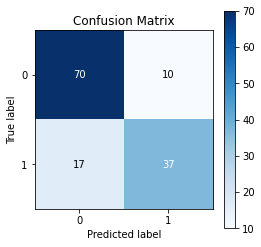

In [ ]:
!pip install -q scikit-plot
import scikitplot as skplt #
skplt.metrics.plot_confusion_matrix(y_test,y_pred, figsize=(4,4))

### *Score del Modelo Naive Bayes*

In [ ]:
from sklearn.metrics import accuracy_score
print('El accuracy para mi modelo de Naive Bayes es :{0:.2f}'.format(accuracy_score(y_test,y_pred))) 

El accuracy para mi modelo de Naive Bayes es :0.80


In [ ]:
from sklearn.metrics import classification_report 
print("El informe de clasificación es el siguiente...\n")
print(classification_report(y_test,y_pred))

El informe de clasificación es el siguiente...

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        80
           1       0.79      0.69      0.73        54

    accuracy                           0.80       134
   macro avg       0.80      0.78      0.79       134
weighted avg       0.80      0.80      0.80       134

